# Sigmoid Exam Part 3


## Data Importation

Connect to Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import some important libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/data_v5.csv')
data.head()

,Unnamed: 0,title,age_rating,mac_support,linux_support,awards,overall_review_%,overall_review_count,Strategy,Racing,...,release_year_category_Bin_3,release_year_category_Bin_4,average_developer_rating_category_Bin_1,average_developer_rating_category_Bin_2,average_developer_rating_category_Bin_3,average_developer_rating_category_Bin_4,average_publisher_rating_category_Bin_1,average_publisher_rating_category_Bin_2,average_publisher_rating_category_Bin_3,average_publisher_rating_category_Bin_4
0,0,Counter-Strike 2,0,0,1,1,87.0,8062218.0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,Dota 2,0,1,1,0,81.0,2243112.0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,2,Ghost of Tsushima DIRECTOR'S CUT,1,0,0,0,89.0,12294.0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,3,ELDEN RING,1,0,0,6,93.0,605191.0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,4,Destiny 2,1,0,0,0,80.0,594713.0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [4]:
data.columns

Index(['Unnamed: 0', 'title', 'age_rating', 'mac_support', 'linux_support',
       'awards', 'overall_review_%', 'overall_review_count', 'Strategy',
       'Racing', 'Action', 'Early Access', 'Software Training',
       'Audio Production', 'Utilities', 'Education', 'Game Development',
       'Sports', 'Animation & Modeling', 'Web Publishing', 'RPG', 'Simulation',
       'Video Production', 'Adventure', 'Design & Illustration',
       'Massively Multiplayer', 'Free to Play', 'Indie', 'Movie', 'Casual',
       'LAN Co-op', 'VR Only', 'Remote Play on TV', 'Profile Features Limited',
       'Remote Play on Phone', 'Online Co-op', 'VR Supported',
       'Remote Play Together', 'SteamVR Collectibles', 'HDR available',
       'Steam Turn Notifications', 'Online PvP', 'Valve Anti-Cheat enabled',
       'Commentary available', 'LAN PvP', 'Single-player',
       'Captions available', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'Mods',
       'Steam is learning about this game', 'M

In [5]:
data = data.drop(columns=['Unnamed: 0'])

Drop the title column because it is irrelevant, as it shouldn't play any role on the rating of the game.

In [6]:
data = data.drop('title', axis=1)

## Model Creation

Import the tools:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Split the dataset into train set and test set.

In [8]:
X = data.drop('overall_review_%', axis=1)
y = data['overall_review_%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Linear Regression Model:

In [9]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R-squared: ', r2)

Mean Absolute Error:  4.334931058905101
Mean Squared Error:  29.77910271972746
R-squared:  0.9045143302722536


Train the Decision Tree Regressor Model:

In [11]:
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R-squared: ', r2)

Mean Absolute Error:  5.3176275691104875
Mean Squared Error:  51.81745543621306
R-squared:  0.8338491094751245


Train the Random Forest Regressor Model:

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R-squared: ', r2)

Mean Absolute Error:  4.225814834190285
Mean Squared Error:  30.351263801461958
R-squared:  0.9026797154218411


Train the Gradient Boosting Regressor Model:

In [15]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R-squared: ', r2)

Mean Absolute Error:  4.219656524007711
Mean Squared Error:  29.616240776673934
R-squared:  0.9050365414970842


Create a Neural Network Model:

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
def create_neural_network():
    model = Sequential()
    model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [19]:
nn_model = create_neural_network()
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

nn_pred = nn_model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, nn_pred)
mse = mean_squared_error(y_test, nn_pred)
r2 = r2_score(y_test, nn_pred)

250/250 [==============================] - 1s 3ms/step


In [20]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               44500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 420501 (1.60 MB)
Trainable params: 420501 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R-squared: ', r2)

Mean Absolute Error:  77.2148667250657
Mean Squared Error:  6274.005506194469
R-squared:  -19.11738309488025


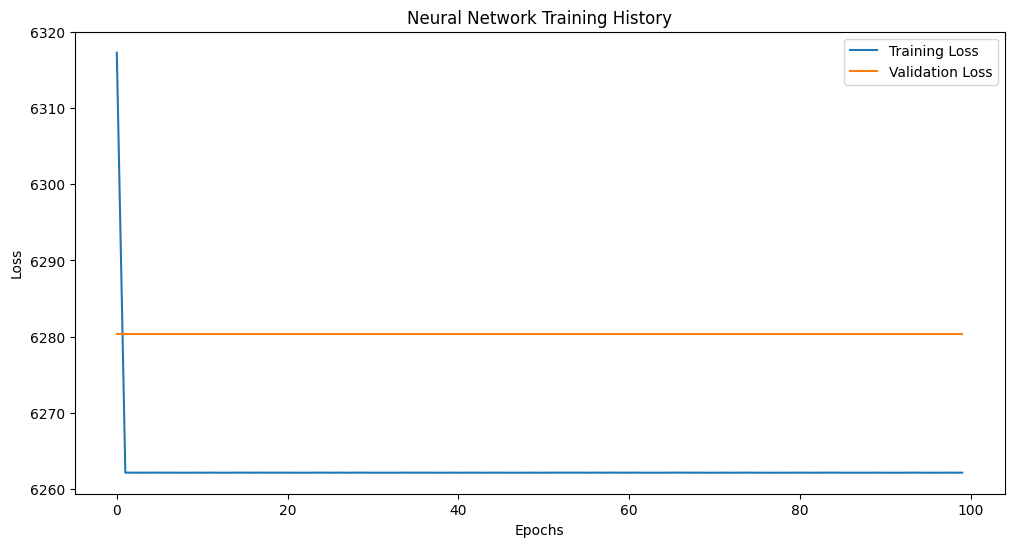

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Creation Conclusion:

The part involved building several regression models to predict the overall review percentage of games based on various features extracted from the dataset.

* Linear Regression: Achieved a Mean Absolute Error (MAE) of 4.33, Mean Squared Error (MSE) of 29.78, and an R-squared (R²) of 0.90. This model showed a high level of accuracy and explained 90% of the variance in the overall review percentage.

* Decision Tree Regressor: Achieved an MAE of 5.32, MSE of 51.82, and an R² of 0.83. While the performance was decent, it was not as accurate as Linear Regression.

* Random Forest Regressor: Achieved an MAE of 4.23, MSE of 30.35, and an R² of 0.90. This model performed similarly to Linear Regression, indicating strong predictive power.
* Gradient Boosting Regressor: Achieved an MAE of 4.22, MSE of 29.62, and an R² of 0.91. This model had the best performance, slightly outperforming the Random Forest and Linear Regression models.

* Neural Network Model: Achieved an MAE of 77.21, MSE of 6274.01, and an R² of -19.12. The neural network model significantly underperformed compared to other models, likely due to overfitting or suboptimal hyperparameters.